# MMDetection 3.0 설치

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


Wed Jul  5 04:39:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# install
!pip3 install openmim
!mim install mmengine
!mim install "mmcv>=2.0.0,<2.1.0"

# gitclone
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

# version
import mmdet
print(mmdet.__version__)
# Example output: 3.0.0, or an another version.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.2 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.1/433.1 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 27.7 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 22.1 MB/s eta 0:00:00
Cloning into 'mmdetection'...
remote: Enumerating objects: 36713, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 36713 (delta 58), reused 136 (delta 36), pack-reused 36536
Receiving objects: 100% (36713/36713), 56.86 MiB | 25.15 MiB/s, done.
Resolving deltas: 100% (25753/25753), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Prepa

In [ ]:
# Check Pytorch installation
import torch, torchvision
print("torch version:",torch.__version__, "cuda:",torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print("mmdetection:",mmdet.__version__)

# Check mmcv installation
import mmcv
print("mmcv:",mmcv.__version__)

# Check mmengine installation
import mmengine
print("mmengine:",mmengine.__version__)

torch version: 2.0.1+cu118 cuda: True
mmdetection: 3.1.0
mmcv: 2.0.1
mmengine: 0.8.0


In [ ]:
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest .

processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 85.6 MB/s eta 0:00:00
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /content/mmdetection
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /content/mmdetection


In [ ]:
# case a
%run demo/image_demo.py demo/demo.jpg rtmdet_tiny_8xb32-300e_coco.py --weights rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth --device cpu

Loads checkpoint by local backend from path: rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

07/05 04:40:16 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
07/05 04:40:16 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


Output()

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming 
release, it will be required to pass the indexing argument. (Triggered internally at 
../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

results have been saved at outputs


In [ ]:
# case b
from mmdet.apis import init_detector, inference_detector

config_file = 'rtmdet_tiny_8xb32-300e_coco.py'
checkpoint_file = 'rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cuda:0'
inference_detector(model, 'demo/demo.jpg')

Loads checkpoint by local backend from path: rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



<DetDataSample(

    META INFORMATION
    batch_input_shape: (640, 640)
    pad_shape: (640, 640)
    scale_factor: (1.0, 1.0)
    img_id: 0
    ori_shape: (427, 640)
    img_path: 'demo/demo.jpg'
    img_shape: (640, 640)

    DATA FIELDS
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([], dtype=torch.int64)
            bboxes: tensor([], size=(0, 4))
        ) at 0x7ff68c8db040>
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([], dtype=torch.int64)
            bboxes: tensor([], size=(0, 4))
        ) at 0x7ff68c8db070>
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            scores: tensor([0.8703, 0.7677, 0.7428, 0.6995, 0.6847, 0.6238, 0.6097, 0.6063, 0.5566,
                        0.5535, 0.5015, 0.4779, 0.4746, 0.4718, 0.4639, 0.4491, 0.4410, 0.4129,

# 데이터 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q /content/drive/MyDrive/인공지능/EfficientDet_PTH/merge_2x2.zip -d /content/merge_2x2

replace /content/merge_2x2/merge_2x2/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
def count_files(path):
    count = 0
    for root, dirs, files in os.walk(path):
      # os.walk: 시작 경로를 기준으로 하위 디렉토리를 재귀적으로 탐색하며, 각 디렉토리에서는 해당 디렉토리의 하위 파일들도 함께 반환합니다.
        count += len(files)
    return count

In [ ]:
import os
# 라벨리 데이터 갯수
path = '/content/merge_2x2/merge_2x2/real_labels'
count = count_files(path)
print(f'Total number of files in {path}: {count}')  # 1596

# 원천 데이터 갯수
path = '/content/merge_2x2/merge_2x2/images'
count = count_files(path)
print(f'Total number of files in {path}: {count}')  # 798

Total number of files in /content/merge_2x2/merge_2x2/real_labels: 1000
Total number of files in /content/merge_2x2/merge_2x2/images: 1000


# 데이터 확인

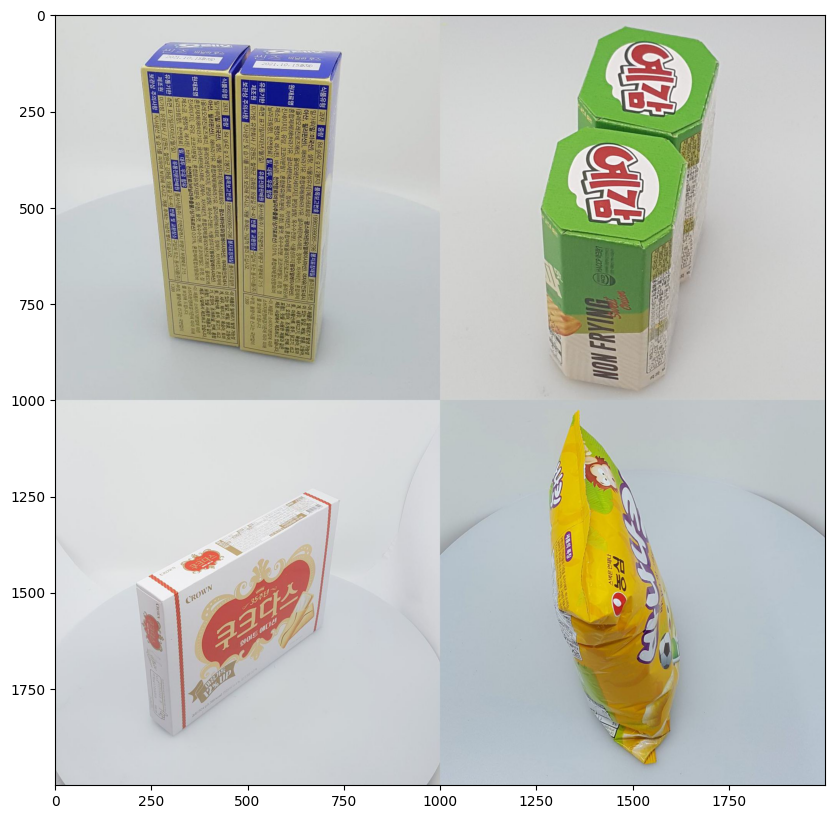

In [ ]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/merge_2x2/merge_2x2/images/merged_image_2x2_1.jpg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

# XML2JSON

In [ ]:
# name tag 정보를 받아오기 위해 설치
!apt-get install -y xmlstarlet
# 온라인 파서 이용 http://json.parser.online.fr/ 또는 jq 유틸리티 설치
!sudo apt-get install jq

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xmlstarlet is already the newest version (1.6.1-2build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
jq is already the newest version (1.6-1ubuntu0.20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
#voc 포맷을 coco 포맷으로 변환하는 패키지
#https://github.com/yukkyo/voc2coco.git 의 How to use 참고
!git clone https://github.com/yukkyo/voc2coco.git /content/Samples/voc2coco

fatal: destination path '/content/Samples/voc2coco' already exists and is not an empty directory.


In [ ]:
!mkdir /content/Samples/MetaSet

mkdir: cannot create directory ‘/content/Samples/MetaSet’: File exists


In [ ]:
# images명을 test, valid, train set으로 나누기

import os
import random

# 이미지 파일에서 추출하는게 정확하나 현재 meta.xml 파일을 읽어야 해서 일단
# meta.xml 파일을 불러왔다

# 이미지 폴더 경로
image_folder = '/content/merge_2x2/merge_2x2/images'

# 파일명을 저장할 텍스트 파일 경로
train_file = '/content/Samples/MetaSet/train.txt'
valid_file = '/content/Samples/MetaSet/valid.txt'
test_file = '/content/Samples/MetaSet/test.txt'

# 파일명에서 확장자를 제외하는 함수
def remove_extension(file_name):
    return os.path.splitext(file_name)[0]

# 이미지 폴더 내의 파일명 추출
file_names = []
for file_name in os.listdir(image_folder):
    if file_name.endswith('.jpg'):
        file_names.append(remove_extension(file_name))

# 파일명을 섞은 후 비율에 맞게 분할
random.shuffle(file_names)
total_count = len(file_names)
train_count = int(0.7 * total_count)  # 60% train
valid_count = int(0.3 * total_count)  # 20% validation
test_count = total_count - train_count - valid_count  # remaining for test

# 파일명을 각각의 파일에 저장
with open(train_file, 'w') as f:
    for file_name in file_names[:train_count]:
        f.write(file_name + '\n')

with open(valid_file, 'w') as f:
    for file_name in file_names[train_count:train_count+valid_count]:
        f.write(file_name + '\n')

with open(test_file, 'w') as f:
    for file_name in file_names[train_count+valid_count:]:
        f.write(file_name + '\n')

print('파일명이 성공적으로 저장되었습니다.')

파일명이 성공적으로 저장되었습니다.


In [ ]:
# xml 파일 확인

import xml.dom.minidom

root = '/content/merge_2x2/merge_2x2/real_labels'
file_name = '/merged_image_2x2_1.xml'

# Load XML file
dom = xml.dom.minidom.parse(root + file_name)
pretty_xml = dom.toprettyxml(indent="    ")

# Print the pretty-printed XML
print(pretty_xml)

<?xml version="1.0" ?>
<annotation>
    <folder>/119.상품 이미지 데이터/01.데이터/1.Training/원천데이터/과자/15175_미가방유한회사)오레오씬즈바닐라무스84G/</folder>
    <filename>merged_image_2x2_1.jpg</filename>
    <path>/119.상품 이미지 데이터/01.데이터/1.Training/원천데이터/과자/15175_미가방유한회사)오레오씬즈바닐라무스84G/15175_30_m_14.jpg</path>
    <source>
        <database>Unknown</database>
    </source>
    <size>
        <width>1000</width>
        <height>1000</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>15175</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <bndbox>
            <xmin>221</xmin>
            <ymin>70</ymin>
            <xmax>509</xmax>
            <ymax>863</ymax>
        </bndbox>
    </object>
    <object>
        <name>15175</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <bndbox>
            <xmin>467</xmin>
            <ymin>85</ymin>
  

In [ ]:
# 텍스트 파일 생성: annotation tag 종류 확인
!grep -REoh '<name>[^<]*</name>' /content/merge_2x2/merge_2x2/real_labels | sort | uniq
# 해태포키 블루베리, 꼬칼곤 고소한맛

# 텍스트 파일 생성:
!grep -ERoh '<name>[^<]*</name>' /content/merge_2x2/merge_2x2/real_labels | sed -e 's/<name>//g' -e 's/<\/name>//g' | sort | uniq > /content/Samples/labels.txt
# 파일 경로 위치 확인 할 것

<name>10091</name>
<name>10092</name>
<name>10093</name>
<name>10094</name>
<name>10095</name>
<name>10178</name>
<name>10209</name>
<name>10210</name>
<name>15033</name>
<name>15046</name>
<name>15175</name>
<name>20164</name>
<name>20167</name>
<name>20211</name>
<name>25679</name>
<name>30060</name>
<name>30061</name>
<name>30064</name>
<name>30066</name>
<name>30086</name>
<name>30096</name>
<name>30099</name>
<name>30119</name>
<name>30120</name>
<name>30140</name>
<name>30152</name>
<name>30166</name>
<name>30291</name>
<name>30292</name>
<name>35044</name>
<name>45219</name>
<name>45220</name>
<name>45221</name>
<name>45222</name>
<name>45227</name>
<name>50061</name>
<name>50062</name>
<name>50063</name>
<name>50098</name>
<name>50117</name>
<name>65621</name>
<name>65629</name>
<name>65719</name>
<name>65723</name>
<name>65727</name>
<name>65858</name>
<name>65890</name>
<name>90072</name>
<name>90073</name>
<name>90078</name>


In [ ]:
!python /content/Samples/voc2coco/voc2coco.py --ann_dir /content/merge_2x2/merge_2x2/real_labels \
--ann_ids /content/Samples/MetaSet/test.txt \
--labels /content/Samples/labels.txt \
--output /content/Samples/test.json \
--ext xml

!python /content/Samples/voc2coco/voc2coco.py --ann_dir /content/merge_2x2/merge_2x2/real_labels \
--ann_ids /content/Samples/MetaSet/train.txt \
--labels /content/Samples/labels.txt \
--output /content/Samples/train.json \
--ext xml

!python /content/Samples/voc2coco/voc2coco.py --ann_dir /content/merge_2x2/merge_2x2/real_labels \
--ann_ids /content/Samples/MetaSet/valid.txt \
--labels /content/Samples/labels.txt \
--output /content/Samples/valid.json \
--ext xml

Start converting !
0it [00:00, ?it/s]
Start converting !
100% 700/700 [00:00<00:00, 9981.96it/s]
Start converting !
100% 300/300 [00:00<00:00, 9270.14it/s]


In [ ]:
!rm '/content/Samples/labels.txt'
!rm '/content/Samples/test.json'
!rm '/content/Samples/train.json'
!rm '/content/Samples/valid.json'

# 모델 학습

- Configuration 모델 준비

In [ ]:
from mmengine.config import Config
cfg = Config.fromfile('/content/mmdetection/projects/EfficientDet/configs/efficientdet_effb3_bifpn_8xb16-crop896-300e_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
dataset_type = 'CocoDataset'
data_root = 'data/coco/'
backend_args = None
train_pipeline = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='RandomResize',
        scale=(
            896,
            896,
        ),
        ratio_range=(
            0.1,
            2.0,
        ),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(
        896,
        896,
    )),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackDetInputs'),
]
test_pipeline = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='Resize', scale=(
        896,
        896,
    ), keep_ratio=True),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='PackDetInputs',
        meta_keys=(
            'img_id',
            'img_path',
            'ori_shape',
            'img_shape',
            'scale_factor',
        )),
]
train_dataloader = dict(
    batch_size=16,
    nu

- Pretrained model 다운로드

In [ ]:
# -c url에서 다운받아 -0 경로에 저장한다.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v3.0/efficientdet/efficientdet_effb3_bifpn_8xb16-crop896-300e_coco/efficientdet_effb3_bifpn_8xb16-crop896-300e_coco_20230223_122457-e6f7a833.pth \
      -O checkpoints/efficientdet_training.pth


mkdir: cannot create directory ‘checkpoints’: File exists
--2023-07-05 08:59:34--  https://download.openmmlab.com/mmdetection/v3.0/efficientdet/efficientdet_effb3_bifpn_8xb16-crop896-300e_coco/efficientdet_effb3_bifpn_8xb16-crop896-300e_coco_20230223_122457-e6f7a833.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.48.206, 47.246.48.208, 47.246.48.209, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.48.206|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



- configuration 수정

In [ ]:
from mmengine.runner import set_random_seed

# Modify dataset classes and color
cfg.metainfo = {
  'classes': ('65621', '50098', '30152', '45219', '30064',
              '30166', '50117', '50062', '30120', '20211',
              '10178', '45221', '10092', '30061', '10091',
              '30119', '25679', '30086', '50063', '15033',
              '45222', '65629', '65858', '30066', '50061',
              '20164', '10094', '90078', '30140', '15046',
              '45227', '30060', '15175', '10093', '65723',
              '90072', '10210', '30292', '10209', '45220',
              '35044', '30099', '30096', '65727', '65719',
              '65890', '90073', '10095', '20167', '30291'),
    'palette': [(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),
                (220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60),(220, 20, 60)]
}

cfg.train_cfg = dict(type='EpochBasedTrainLoop', max_epochs=50, val_interval=5)
cfg.train_dataloader.batch_size = 1


# Modify dataset type and path
cfg.data_root = '/content'

cfg.train_dataloader.dataset.ann_file = 'Samples/train.json'
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix.img = 'merge_2x2/merge_2x2/images/'
cfg.train_dataloader.dataset.metainfo = cfg.metainfo

#/content/merge_4x4/merge_4x4/images
#/content/merge_4x4/merge_4x4/images/30166_30_m_20.jpg
#/content/merge_4x4/merge_4x4/images/30166_30_m_20.jpg


cfg.val_dataloader.dataset.ann_file = 'Samples/valid.json'
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix.img = 'merge_2x2/merge_2x2/images/'
cfg.val_dataloader.dataset.metainfo = cfg.metainfo

#cfg.test_dataloader = cfg.val_dataloader

#cfg.test_dataloader.dataset.ann_file = 'test.json'
#cfg.test_dataloader.dataset.data_root = cfg.data_root
#cfg.test_dataloader.dataset.data_prefix.img = 'images/'
#cfg.test_dataloader.dataset.metainfo = cfg.metainfo

#cfg.test_dataloader.dataset.pipeline = cfg.val_dataloader.dataset.pipeline
'''
# Modify pipelines
cfg.train_dataloader.dataset.pipeline=[
            dict(type='LoadImageFromFile', backend_args=None),
            dict(type='LoadAnnotations', with_bbox=True),
            dict(
                type='RandomResize',
                scale=(896, 896),
                ratio_range=(0.1, 2.0),
                keep_ratio=True),
            dict(type="RandomGrayscale"),
            dict(type='RandomCrop', crop_size=(896, 896)),
            dict(type='RandomFlip', prob=0.5),
            dict(type='PackDetInputs')
        ]
'''
# Modify metric config
cfg.val_evaluator.ann_file = cfg.data_root+'/'+'Samples/valid.json'
#cfg.test_evaluator = cfg.val_evaluator
#cfg.test_evaluator.ann_file = cfg.data_root+'/'+'test.json'

# Modify num classes of the model in box head and mask head
cfg.model.bbox_head.num_classes = 50
# cfg.model.roi_head.mask_head.num_classes = 1

# We can still the pre-trained Mask RCNN model to obtain a higher performance
cfg.load_from = '/content/drive/MyDrive/인공지능/EfficientDet_PTH/07051300_50set_efficientDet_config_Minhodataset_epoch_(80+)30.pth'


# Set up working dir to save files and logs.
cfg.work_dir = '/content/drive/MyDrive/인공지능/EfficientDet_PTH'


# We can set the evaluation interval to reduce the evaluation times
cfg.train_cfg.val_interval = 5
# We can set the checkpoint saving interval to reduce the storage cost
cfg.default_hooks.checkpoint.interval = 5

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optim_wrapper.optimizer.lr = 0.01 / 8
cfg.default_hooks.logger.interval = 10

# Set seed thus the results are more reproducible
# cfg.seed = 0
set_random_seed(0, deterministic=False)

# We can also use tensorboard to log the training process
####################cfg.visualizer.vis_backends.append({"type":'TensorboardVisBackend'})

print(f'Config:\n{cfg.pretty_text}')

Config:
dataset_type = 'CocoDataset'
data_root = '/content'
backend_args = None
train_pipeline = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='RandomResize',
        scale=(
            896,
            896,
        ),
        ratio_range=(
            0.1,
            2.0,
        ),
        keep_ratio=True),
    dict(type='RandomCrop', crop_size=(
        896,
        896,
    )),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackDetInputs'),
]
test_pipeline = [
    dict(type='LoadImageFromFile', backend_args=None),
    dict(type='Resize', scale=(
        896,
        896,
    ), keep_ratio=True),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='PackDetInputs',
        meta_keys=(
            'img_id',
            'img_path',
            'ori_shape',
            'img_shape',
            'scale_factor',
        )),
]
train_dataloader = dict(
    batch_size=1,
    num_w

In [ ]:
import os

save_path = '/content/test.py'
try :
    os.mkdir(os.path.dirname(save_path))
except FileExistsError:
    print(f"Directory already exists: {os.path.dirname(save_path)}")

cfg.dump(save_path)

Directory already exists: /content


- 데이터 로드 및 학습 시작

In [ ]:
from mmengine.config import Config
from mmengine.runner import Runner
runner = Runner.from_cfg(cfg)

07/05 08:59:41 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 209652396
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.1+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,

In [ ]:
runner.train()

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
07/05 04:51:47 - mmengine - INFO - paramwise_options -- backbone.layers.0.bn.weight:weight_decay=0.0
07/05 04:51:47 - mmengine - INFO - paramwise_options -- backbone.layers.0.bn.bias:weight_decay=0.0
07/05 04:51:47 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.depthwise_conv.bn.weight:weight_decay=0.0
07/05 04:51:47 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.depthwise_conv.bn.bias:weight_decay=0.0
07/05 04:51:47 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.se.conv1.conv.bias:weight_decay=0.0
07/05 04:51:47 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.se.conv2.conv.bias:weight_decay=0.0
07/05 04:51:47 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.linear_conv.bn.weight:weight_decay=0.0
07/05 04:51:47 - mmengine - INFO - paramwise_options -- backbone.layers.1.0.linear_conv.bn.bias:weight_decay=0.0
07/05 04:51:47 - mmengine - INF

KeyboardInterrupt: ignored

# 훈련 결과 확인

In [ ]:
import mmcv
from mmdet.apis import init_detector, inference_detector
img = mmcv.imread('/content/IMG_5135.jpg',channel_order='rgb')
#checkpoint_file = '/content/drive/MyDrive/인공지능/EfficientDet_PTH/07041500_50set_efficientDet_config_epoch_epoch_(20+24+)6.pth'
#checkpoint_file = '/content/drive/MyDrive/인공지능/EfficientDet_PTH/07041800_50set_efficientDet_config_SuHwanDataset_epoch_(50+)30.pth'
checkpoint_file = '/content/drive/MyDrive/인공지능/EfficientDet_PTH/07051600_50set_efficientDet_config_Minhodataset_epoch_(110+)20.pth'
model = init_detector(cfg, checkpoint_file, device='cpu')
new_result = inference_detector(model, img)
print(new_result)

Loads checkpoint by local backend from path: /content/drive/MyDrive/인공지능/EfficientDet_PTH/07051600_50set_efficientDet_config_Minhodataset_epoch_(110+)20.pth
<DetDataSample(

    META INFORMATION
    img_id: 0
    scale_factor: (0.2222222222222222, 0.2222222222222222)
    pad_shape: (896, 896)
    img_path: None
    ori_shape: (3024, 4032)
    img_shape: (672, 896)
    batch_input_shape: (896, 896)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[0.0000e+00, 0.0000e+00, 3.9192e+03, 3.0240e+03],
                        [1.3758e+00, 1.0991e+02, 3.7862e+03, 3.0240e+03],
                        [3.5372e+01, 0.0000e+00, 4.0080e+03, 2.9492e+03],
                        [6.6853e+01, 0.0000e+00, 3.9349e+03, 2.8576e+03],
                        [0.0000e+00, 8.0994e+01, 4.0320e+03, 3.0217e+03],
                        [4.3031e+02, 0.0000e+00, 3.9981e+03, 2.6211e+03],
                     

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:757: UserWarning: Warning: The bbox is out of bounds, the drawn bbox may not be in the image
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:828: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(


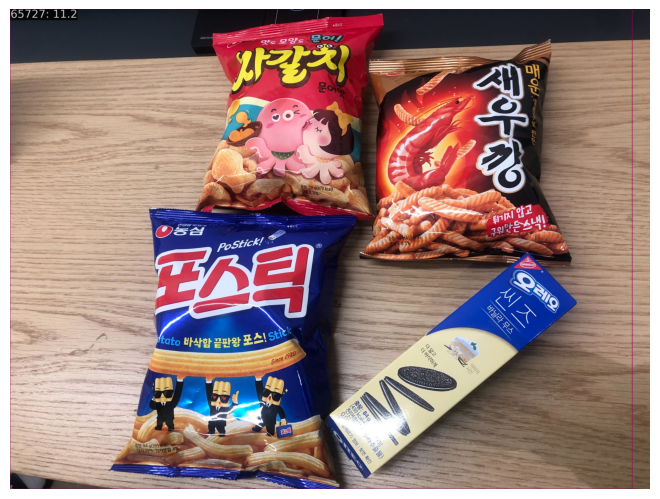

In [ ]:
from mmengine.visualization import Visualizer
# get built visualizer
visualizer_now = Visualizer.get_current_instance()
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer_now.dataset_meta = model.dataset_meta
# show the results
visualizer_now.add_datasample(
    'new_result',
    img,
    data_sample=new_result,
    draw_gt=False,
    wait_time=0,
    out_file=None,
    pred_score_thr=0.1
)
visualizer_now.show()